In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
try:
    # Update these paths with the actual file locations
    airbnb_data = pd.read_csv('new_york_city_airbnb.csv')
    youtube_data = pd.read_csv('youtube_data.csv')

    # Display first few rows
    print("Airbnb Dataset:")
    print(airbnb_data.head())
    
    print("\nYouTube Dataset:")
    print(youtube_data.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Ensure the dataset files are correctly named and located in the same directory as this script.")
except pd.errors.ParserError as e:
    print(f"Parser Error: {e}")
    print("There might be an issue with the file structure. Check the dataset formatting.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Airbnb Dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1       

In [2]:
# Basic information
print(airbnb_data.info())
print(airbnb_data.describe())
print(youtube_data.info())
print(youtube_data.describe())

# Check for null values
print(airbnb_data.isnull().sum())
print(youtube_data.isnull().sum())

# Check for duplicate entries
print(airbnb_data.duplicated().sum())
print(youtube_data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
# Airbnb dataset: Handling missing values
airbnb_data.fillna({'name': 'Unknown', 'reviews_per_month': 0}, inplace=True)
airbnb_data.dropna(subset=['host_name', 'neighbourhood_group'], inplace=True)

# YouTube dataset: Dropping rows with missing values
youtube_data.dropna(inplace=True)

# Verify changes
print(airbnb_data.isnull().sum())
print(youtube_data.isnull().sum())


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10047
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_di

In [4]:
# Airbnb dataset: Removing duplicates
airbnb_data.drop_duplicates(inplace=True)

# YouTube dataset: Removing duplicates
youtube_data.drop_duplicates(inplace=True)

# Verify changes
print(airbnb_data.duplicated().sum())
print(youtube_data.duplicated().sum())


0
0


In [5]:
# Airbnb: Standardizing text data
airbnb_data['name'] = airbnb_data['name'].str.lower().str.strip()
airbnb_data['host_name'] = airbnb_data['host_name'].str.lower().str.strip()

# YouTube: Standardizing column names
youtube_data.columns = youtube_data.columns.str.lower().str.replace(" ", "_")

# Verify changes
print(airbnb_data.head())
print(youtube_data.head())


     id                                              name  host_id  \
0  2539                clean & quiet apt home by the park     2787   
1  2595                             skylit midtown castle     2845   
2  3647               the village of harlem....new york !     4632   
3  3831                   cozy entire floor of brownstone     4869   
4  5022  entire apt: spacious studio/loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         john            Brooklyn    Kensington  40.64749  -73.97237   
1     jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  lisaroxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

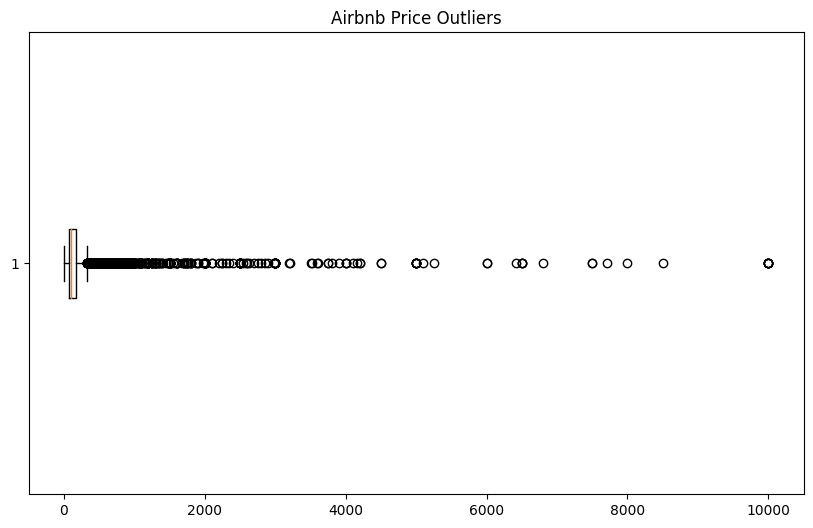

In [6]:
# Airbnb dataset: Visualizing outliers
plt.figure(figsize=(10, 6))
plt.boxplot(airbnb_data['price'], vert=False)
plt.title('Airbnb Price Outliers')
plt.show()

# Remove extreme outliers (e.g., price > 1000)
airbnb_data = airbnb_data[airbnb_data['price'] <= 1000]

# YouTube dataset: Handling outliers in views
q1 = youtube_data['views'].quantile(0.25)
q3 = youtube_data['views'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

youtube_data = youtube_data[(youtube_data['views'] >= lower_bound) & (youtube_data['views'] <= upper_bound)]


In [7]:
# Verify dataset integrity
print(airbnb_data.info())
print(airbnb_data.describe())
print(youtube_data.info())
print(youtube_data.describe())

# Save cleaned datasets
airbnb_data.to_csv('cleaned_airbnb_data.csv', index=False)
youtube_data.to_csv('cleaned_youtube_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48635 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48635 non-null  int64  
 1   name                            48635 non-null  object 
 2   host_id                         48635 non-null  int64  
 3   host_name                       48635 non-null  object 
 4   neighbourhood_group             48635 non-null  object 
 5   neighbourhood                   48635 non-null  object 
 6   latitude                        48635 non-null  float64
 7   longitude                       48635 non-null  float64
 8   room_type                       48635 non-null  object 
 9   price                           48635 non-null  int64  
 10  minimum_nights                  48635 non-null  int64  
 11  number_of_reviews               48635 non-null  int64  
 12  last_review                     

In [8]:
# Analyze basic statistics
print(airbnb_data.describe())  # Summary statistics for numerical columns

# Check top hosts
top_hosts = airbnb_data['host_id'].value_counts().head(5)
print("Top Hosts:\n", top_hosts)

# Analyze availability
print(airbnb_data['availability_365'].value_counts())


                 id       host_id      latitude     longitude         price  \
count  4.863500e+04  4.863500e+04  48635.000000  48635.000000  48635.000000   
mean   1.901979e+07  6.761394e+07     40.728931    -73.952048    141.292937   
std    1.097876e+07  7.859787e+07      0.054567      0.046164    116.751726   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.476304e+06  7.831209e+06     40.690020    -73.982975     69.000000   
50%    1.967722e+07  3.081216e+07     40.722960    -73.955590    105.000000   
75%    2.914624e+07  1.074344e+08     40.763130    -73.936115    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990   1000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48635.000000       48635.000000       48635.000000   
mean         6.974956          23.349193           1.094548   
std         20.269454          44.624195           1.599316   
min          1.000000           0.00

In [9]:
# Analyze the distribution of video categories
categories = youtube_data['category_id'].value_counts()
print("Video Categories Distribution:\n", categories)

# Most liked videos
most_liked = youtube_data.sort_values(by='likes', ascending=False).head(5)
print("Most Liked Videos:\n", most_liked[['title', 'channel_title', 'likes']])


Video Categories Distribution:
 24    8805
10    4651
26    4049
23    3247
22    2821
25    2359
28    2237
17    1878
1     1870
27    1613
15     893
20     658
19     395
2      354
43      57
29      44
Name: category_id, dtype: int64
Most Liked Videos:
                                                    title    channel_title  \
20597        CRISTIANO RONALDO E FRED, O GRANDE ENCONTRO     Desimpedidos   
37355  [CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...        BANGTANTV   
612    BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...          ibighit   
8607                                EXO 엑소 'Universe' MV           SMTOWN   
30756                         Shawn Mendes - In My Blood  ShawnMendesVEVO   

        likes  
20597  889008  
37355  845029  
612    789750  
8607   657258  
30756  598247  


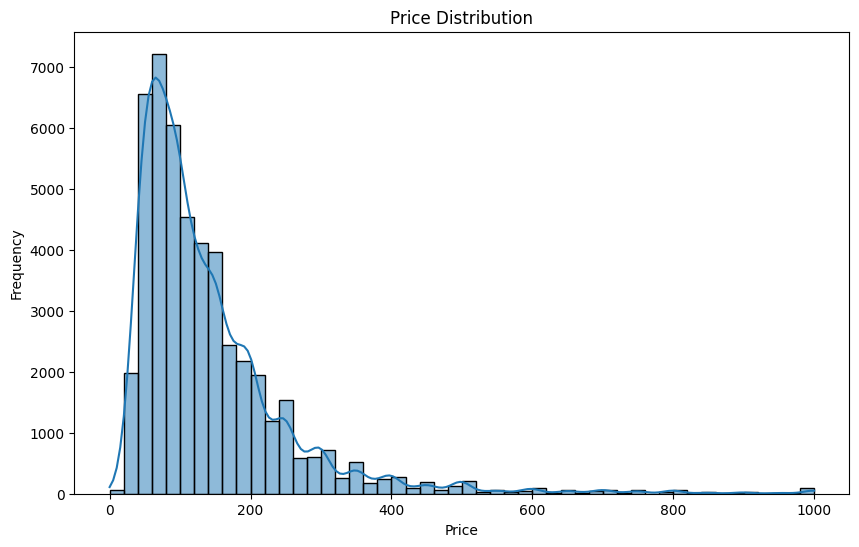

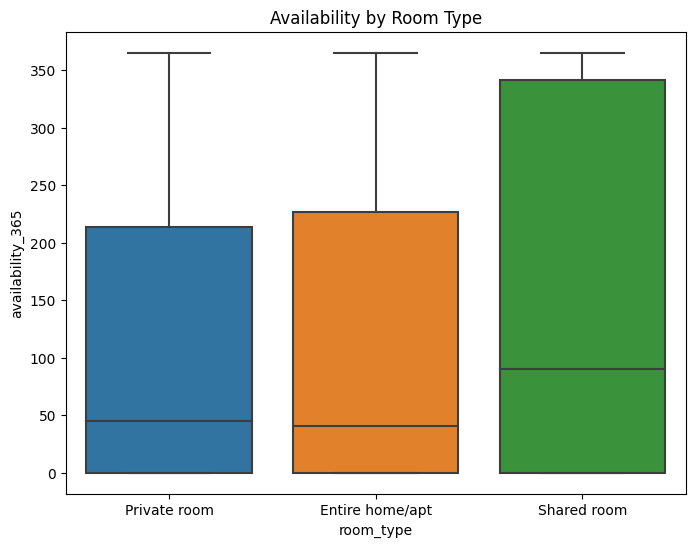

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Availability by room type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='availability_365', data=airbnb_data)
plt.title('Availability by Room Type')
plt.show()


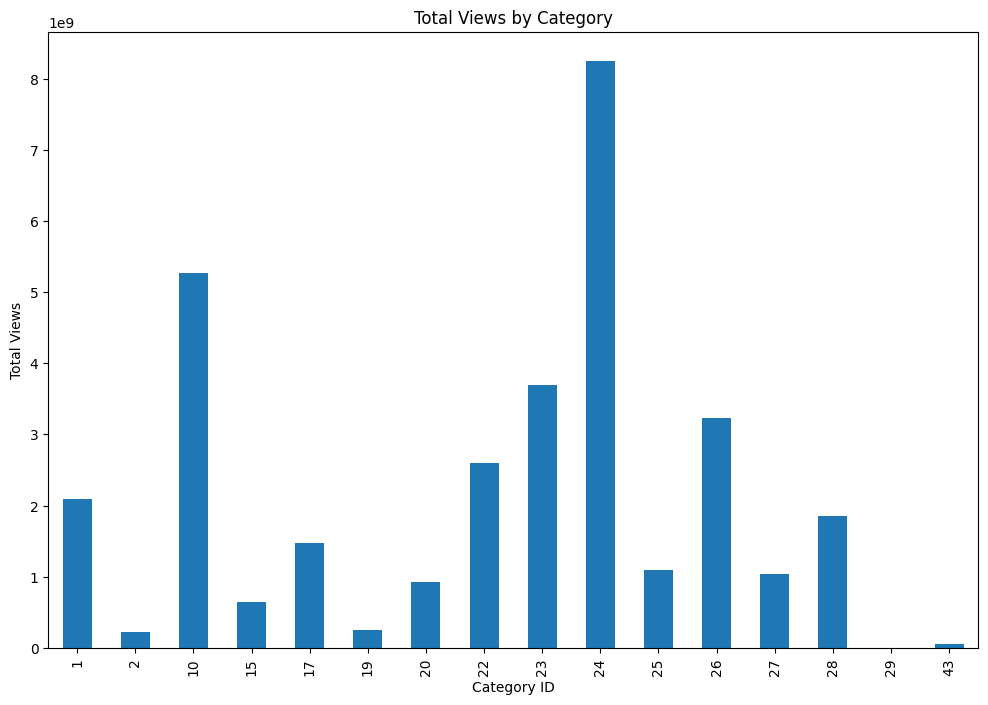

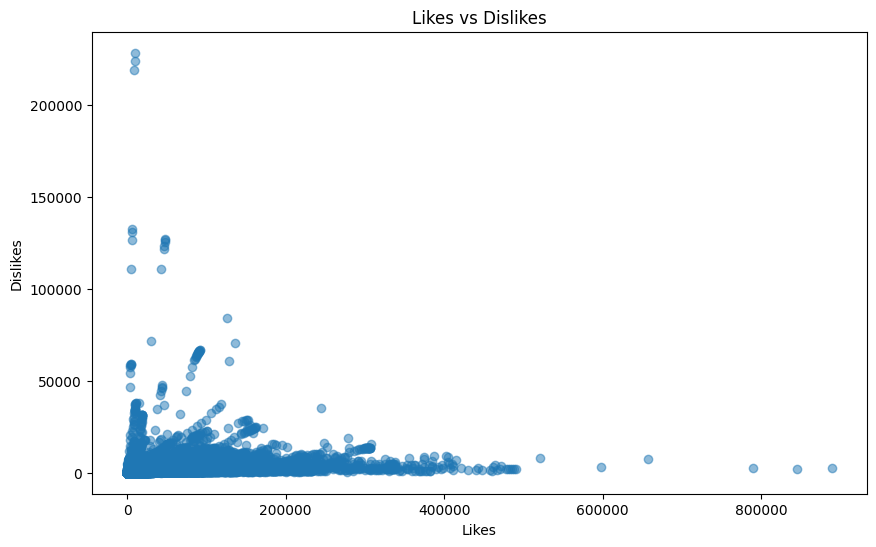

In [11]:
# Popularity by category
plt.figure(figsize=(12, 8))
youtube_data.groupby('category_id')['views'].sum().plot(kind='bar')
plt.title('Total Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.show()

# Likes vs Dislikes
plt.figure(figsize=(10, 6))
plt.scatter(youtube_data['likes'], youtube_data['dislikes'], alpha=0.5)
plt.title('Likes vs Dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

airbnb_data = pd.read_csv('new_york_city_airbnb.csv') 


print(airbnb_data.head())  


print("Columns in the dataset:", airbnb_data.columns)


features = airbnb_data[['latitude', 'longitude', 'availability_365']] 
target = airbnb_data['price']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")



     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


youtube_data = pd.read_csv('youtube_data.csv') 


print(youtube_data.head())  


print("Columns in the dataset:", youtube_data.columns)


features = youtube_data[['views', 'likes', 'dislikes', 'comment_count']]
target = youtube_data['category_id']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")



      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik